In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import matplotlib.pyplot as plt
import fitsio
import glob

import numpy as np
import healpy as hp
import astropy.io.fits as pyfits
import xlens
import astropy.table as astTable

In [2]:
def get_label_in_healpix(field):
    fname = f"/gpfs02/work/xiangchong.li/work/hsc_data/s23b/deepCoadd_anacal2/fields/{field}.fits"
    data = fitsio.read(fname, columns=["ra", "dec"])
    # Set the NSIDE
    NSIDE = 8192
    npix = hp.nside2npix(NSIDE)
    label = np.zeros(npix, dtype=int)
    ra = data['ra']    
    dec = data['dec'] 
    theta = np.deg2rad(90.0 - dec)
    phi = np.deg2rad(ra)
    if "spring" in field:
        ll = 1
    elif "autumn" in field:
        ll = 2
    elif "hectomap" in field:
        ll = 4
    pix = np.unique(hp.ang2pix(NSIDE, theta, phi, nest=True))
    label[pix] = ll
    return label
    
NSIDE = 8192
npix = hp.nside2npix(NSIDE)
labels = np.zeros(npix, dtype=int)
field_list = ["spring1", "spring2", "spring3", "autumn1", "autumn2", "hectomap"]
for field in field_list:
    labels = labels | get_label_in_healpix(field)

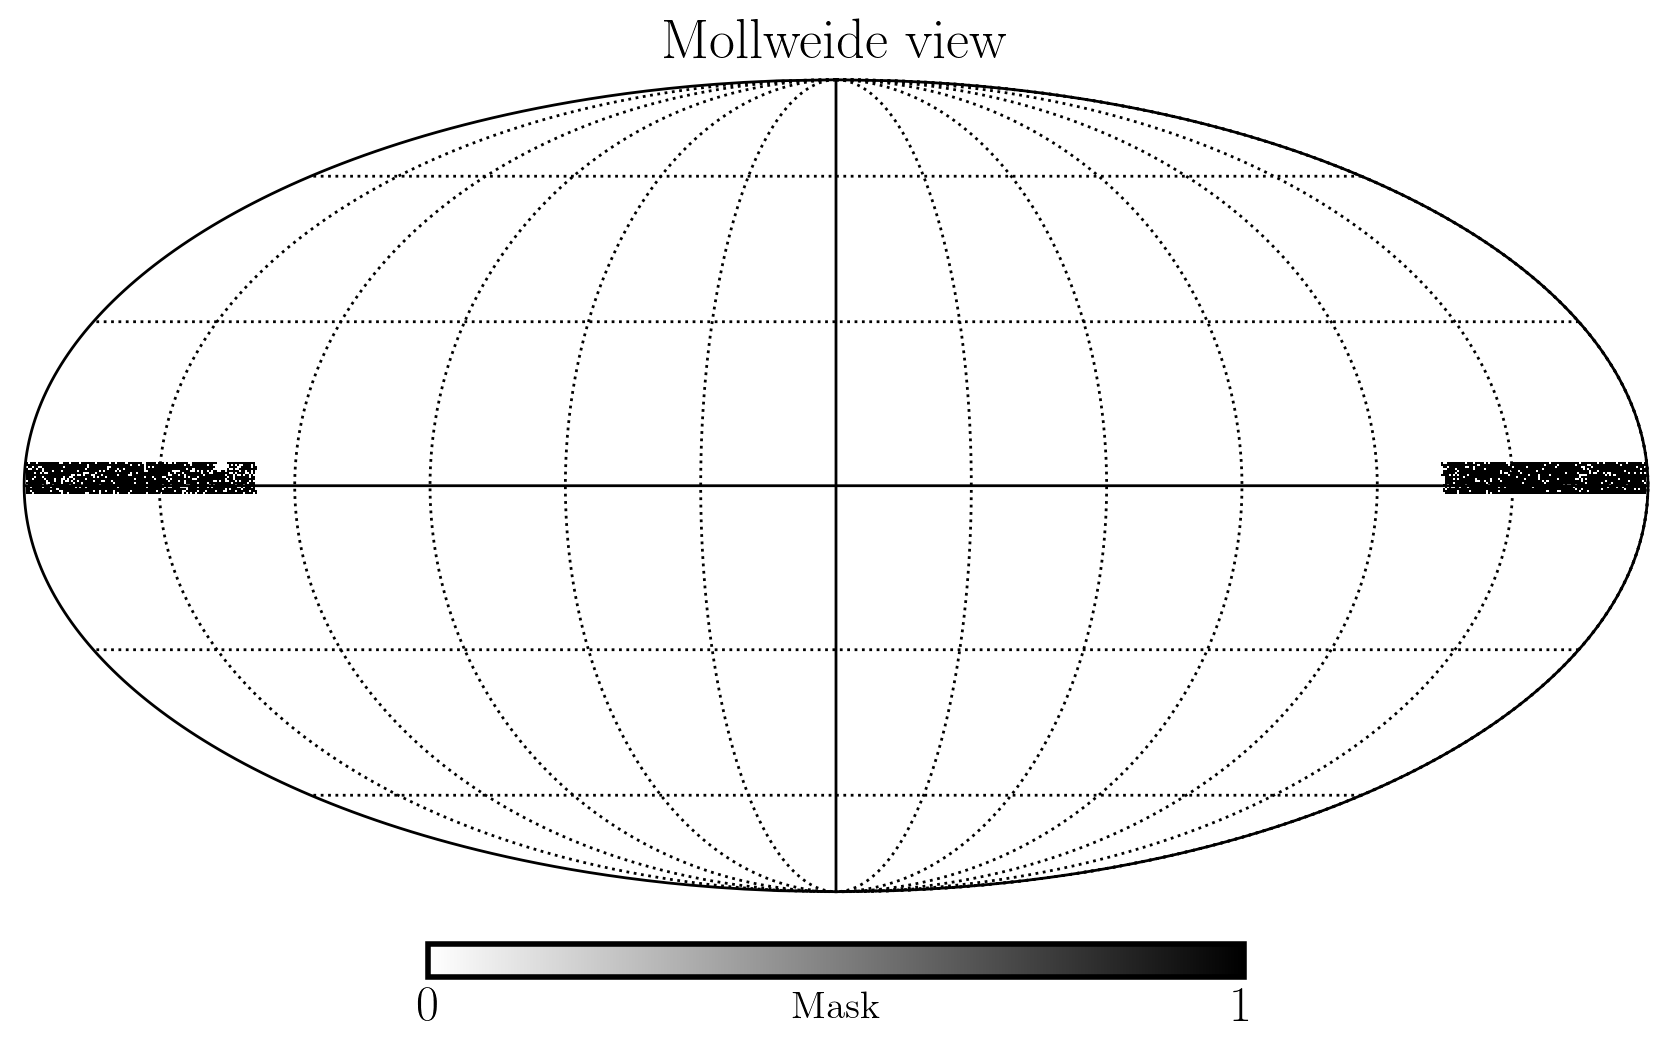

In [6]:
hp.mollview(labels==1, nest=True, cmap="gray_r", unit="Mask")
hp.graticule()
plt.show()

In [8]:
hp.write_map(
    "fdfc_hp_label.fits", 
    labels,
    dtype=int, nest=True, 
    overwrite=True,
)

In [3]:
mask = hp.read_map("/gpfs02/work/xiangchong.li/work/hsc_data/s23b/fdfc_hp_label.fits", nest=True, dtype=int)

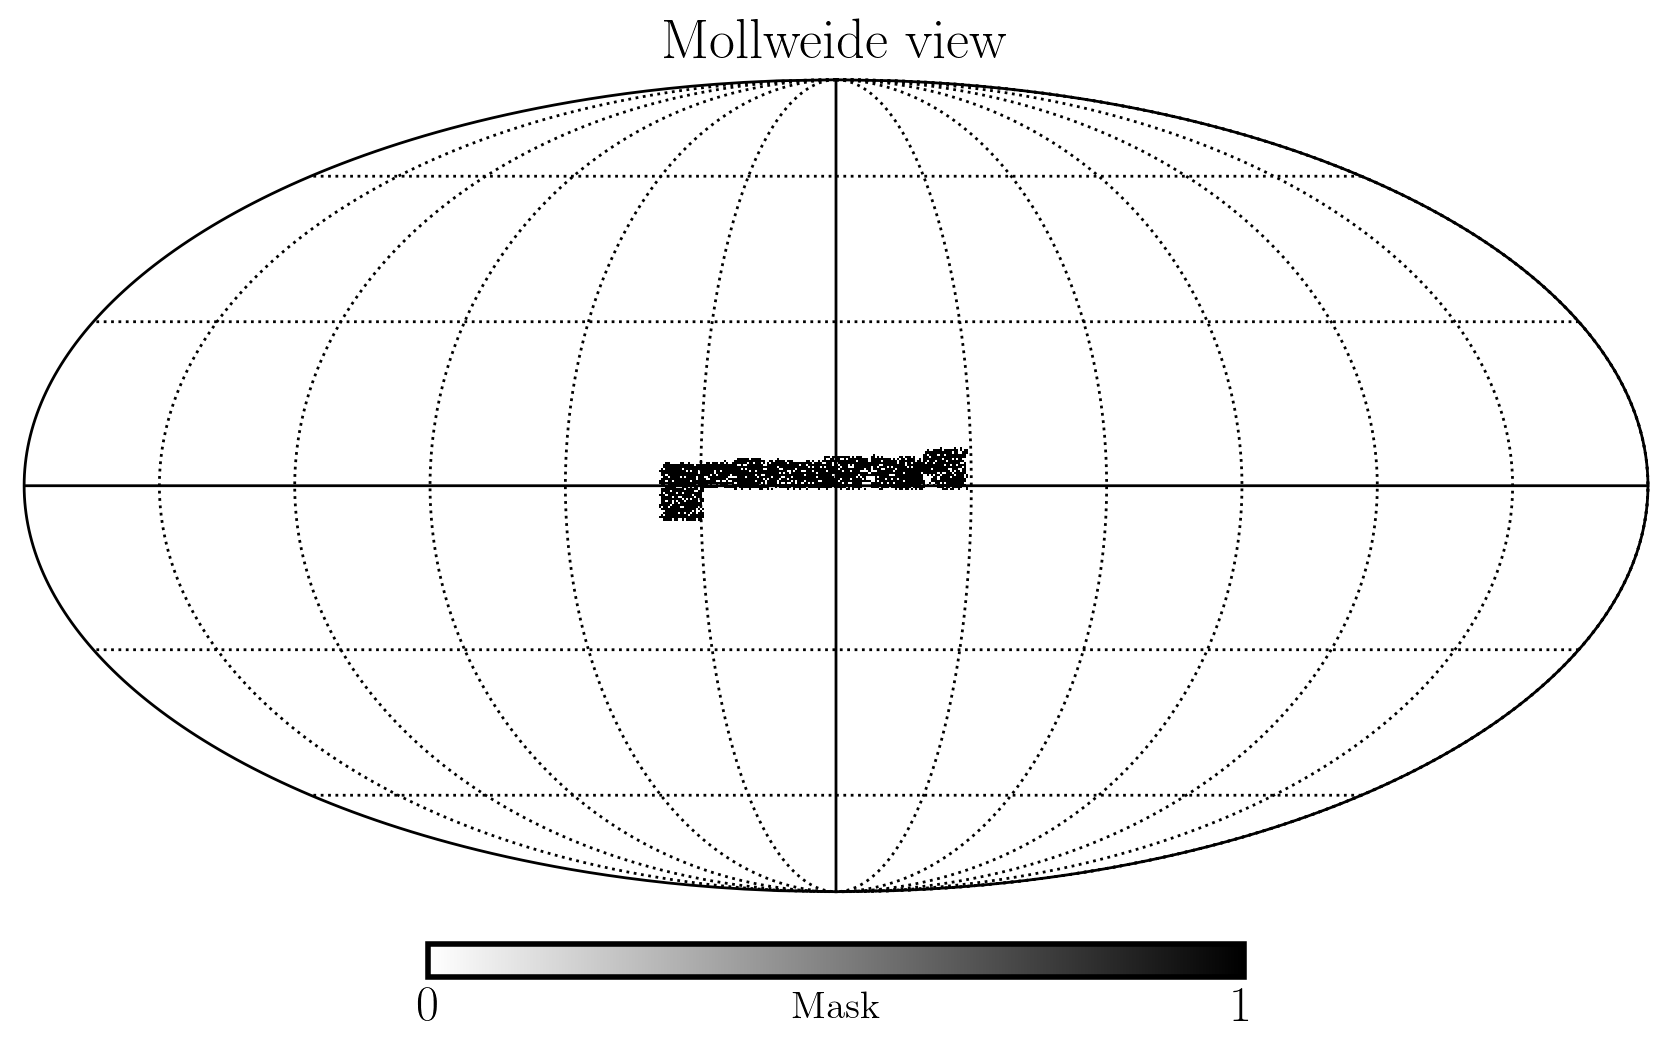

In [4]:
hp.mollview(mask==2, nest=True, cmap="gray_r", unit="Mask")
hp.graticule()
plt.show()